In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import scipy
import pylab
import time


import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
data = df= pd.read_csv('encoded.csv')
X ,y = df.drop('isFraud', axis=1),df.isFraud
y = (y==1).astype(int)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=30, stratify=y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_test,y_test,test_size=0.3, random_state=30, stratify=y_test)

In [5]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier


# build a classifier
clf = RandomForestClassifier(n_estimators=20)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X_train, y_train)

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 1429.88 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_split': 7}

Model with rank: 3
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 4}

GridSearchCV took 4572.12 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None

In [6]:
print("best params is : ",random_search.best_params_)
print("best score is : ", random_search.best_score_)

best params is :  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 7}
best score is :  0.9996317774575431


In [7]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics

In [8]:
y_pred_test = random_search.predict(X_test)
y_pred_test_prob = random_search.predict_proba(X_test)

In [9]:
y_pred_test = random_search.predict(X_test)
#y_pred_test_prob = grid_search.predict_proba(X_test)
print("#####################")
print("Test data")
print("#####################")
print("F1: ", metrics.f1_score(y_test, y_pred_test))
print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, y_pred_test))
print("Brier: ", metrics.brier_score_loss(y_test, y_pred_test))
#print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
print(metrics.classification_report(y_test, y_pred_test))
conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

#####################
Test data
#####################
F1:  0.8571428571428572
Cohen Kappa:  0.8569798524171116
Brier:  0.0003300520224854489
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190633
           1       0.97      0.77      0.86       246

   micro avg       1.00      1.00      1.00    190879
   macro avg       0.98      0.88      0.93    190879
weighted avg       1.00      1.00      1.00    190879



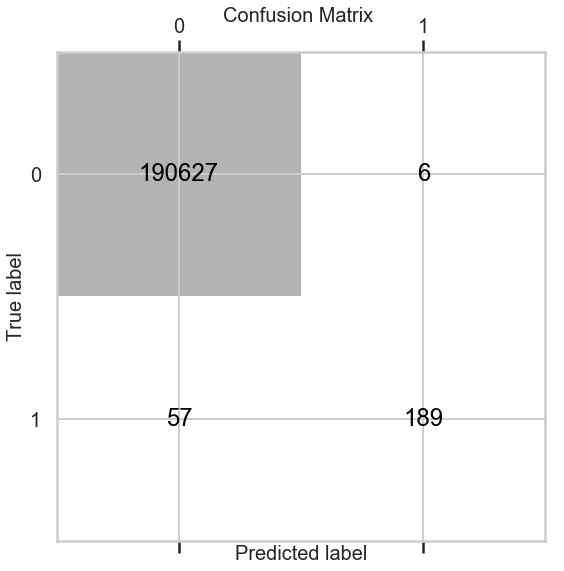

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
plt.title('Confusion Matrix ', size=20)
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
ax.tick_params('x', labelsize = 20)
ax.tick_params('y', labelsize = 20)
plt.tight_layout()

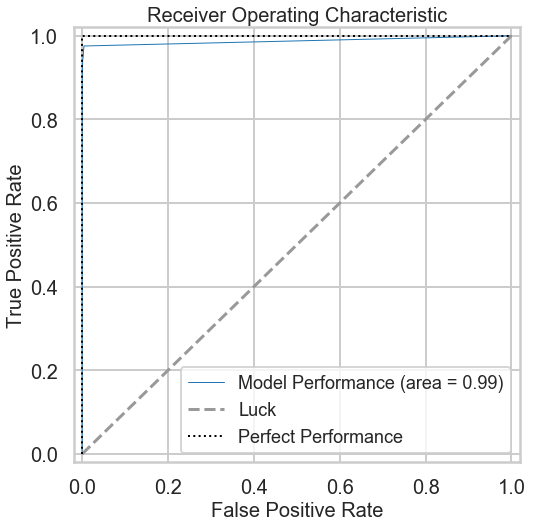

In [11]:
# ROC curve
fig1, ax1 = plt.subplots(figsize=(8, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], 
        [0, 1], 
        '--', 
        color=(0.6, 0.6, 0.6), 
        label='Luck')
    
plt.plot([0, 0, 1], 
        [0, 1, 1], 
        lw=2,
        linestyle=':',
        color='black',
        label='Perfect Performance')
        
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title('Receiver Operating Characteristic', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc="lower right", fontsize=18)
   

In [12]:
print("best params is : ",grid_search.best_params_)
print("best score is : ", grid_search.best_score_)

best params is :  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 3}
best score is :  0.9996272870361753


In [13]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics

In [14]:
y_pred_test = grid_search.predict(X_test)
y_pred_test_prob = grid_search.predict_proba(X_test)

In [15]:
y_pred_test = grid_search.predict(X_test)
#y_pred_test_prob = grid_search.predict_proba(X_test)
print("#####################")
print("Test data")
print("#####################")
print("F1: ", metrics.f1_score(y_test, y_pred_test))
print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, y_pred_test))
print("Brier: ", metrics.brier_score_loss(y_test, y_pred_test))
#print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
print(metrics.classification_report(y_test, y_pred_test))
conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

#####################
Test data
#####################
F1:  0.8610478359908884
Cohen Kappa:  0.8608901992421231
Brier:  0.00031957418050178386
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190633
           1       0.98      0.77      0.86       246

   micro avg       1.00      1.00      1.00    190879
   macro avg       0.99      0.88      0.93    190879
weighted avg       1.00      1.00      1.00    190879



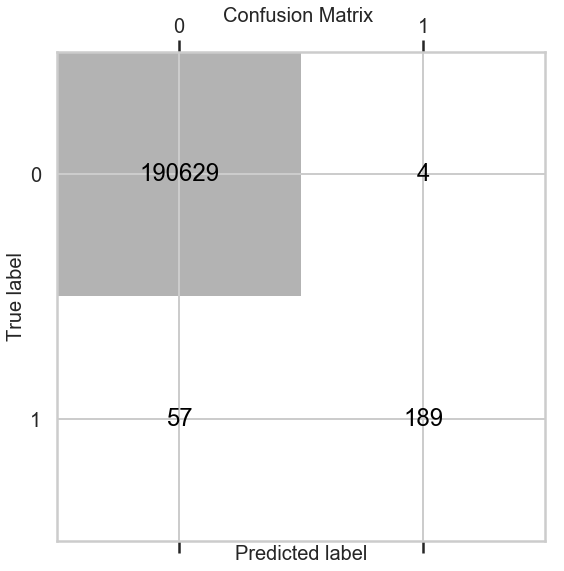

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
plt.title('Confusion Matrix ', size=20)
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
ax.tick_params('x', labelsize = 20)
ax.tick_params('y', labelsize = 20)
plt.tight_layout()

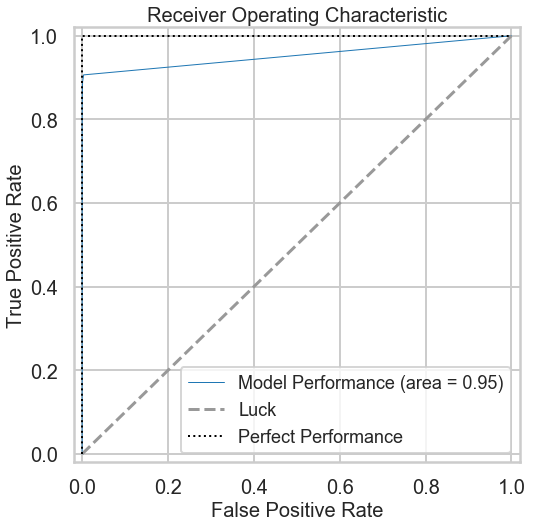

In [17]:
# ROC curve
fig1, ax1 = plt.subplots(figsize=(8, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], 
        [0, 1], 
        '--', 
        color=(0.6, 0.6, 0.6), 
        label='Luck')
    
plt.plot([0, 0, 1], 
        [0, 1, 1], 
        lw=2,
        linestyle=':',
        color='black',
        label='Perfect Performance')
        
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title('Receiver Operating Characteristic', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc="lower right", fontsize=18)
   